# Achieving Stationarity in Time Series

Time series models work under the assumption that the underlying data is stationary. 

---
**NOTE**

Stationarity: mean, variance, and covariance are not time-dependent

---

removing trends:
- a transformation of the data, 
- removing a rolling statistic, and 
- differencing.

decomposition:
- additive decomposition
- multiplicative decomposition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
sns.set()

I utilized historical daily average closing prices of GOOG over the last four years. The data is obtained from [Yahoo finance](https://finance.yahoo.com/quote/GOOG/). The data is provided in OHLC ([open-high-low-close](https://en.wikipedia.org/wiki/Open-high-low-close_chart)) format. I use 'Date' as index and convert it to pandas datetime object. 

In [2]:
df = pd.read_csv('../dataset/GOOG-year.csv',index_col="Date")

# Convert date index to datetime object
df.index = pd.to_datetime(df.index)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-02,778.200012,781.650024,763.450012,768.700012,768.700012,1872400
2016-11-03,767.250000,769.950012,759.030029,762.130005,762.130005,1943200
2016-11-04,750.659973,770.359985,750.560974,762.020020,762.020020,2134800
2016-11-07,774.500000,785.190002,772.549988,782.520020,782.520020,1585100
2016-11-08,783.400024,795.632996,780.190002,790.510010,790.510010,1366900


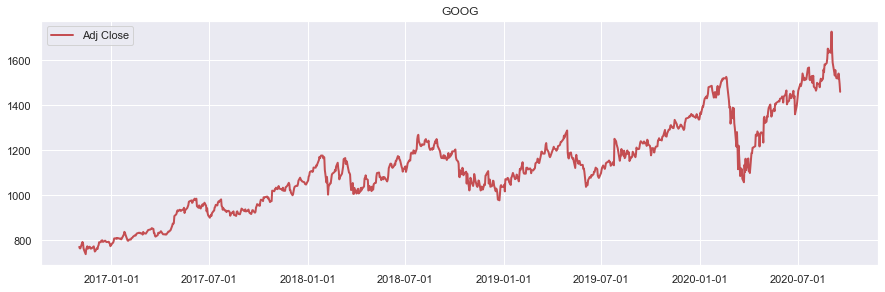

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig = plt.figure(figsize = (15,5))
plt.gcf().autofmt_xdate()
myFmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.plot(df.index,df['Adj Close'], color='r', lw=2.,label = 'Adj Close')
plt.title('GOOG')
plt.legend()
plt.show()

## Augmented Dickey-Fuller test

Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected or fail to be reject. The result must be interpreted for a given problem to be meaningful.

Nevertheless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary.

The [Augmented Dickey-Fuller test](https://en.wikipedia.org/wiki/Augmented_Dickey–Fuller_test) is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

- Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Below is an example of calculating the Augmented Dickey-Fuller test on the GOOG Adj Close dataset. The statsmodels library provides the adfuller() function that implements the test.

In [4]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Adj Close'])
print('Augmented Dickey–Fuller (ADF) statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Augmented Dickey–Fuller (ADF) statistic: -1.379873
p-value: 0.591886
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


Running the example prints the test statistic value of -1. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset) at some level of confidence.

If the test statistic is less (more negative) than the critical value, then the null hypothesis is rejected and no unit root is present.

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -1 is not less than the critical values listed.

This suggests that we can not reject the null hypothesis at any significance level.

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

## Transformation

There are several transformations available in Python’s [NumPy library](https://numpy.org/doc/stable/reference/routines.math.html) including logarithms, square roots, and more. I created a new column for a few of these transformations by applying them to the adjusted closing price column.

In [5]:
# Create transformation columns of the adjusted close price

# Calculate the log of the adjusted close prices
df['adj_close_log'] = np.log(df['Adj Close'])

# Calculate the square root of the adjusted close prices
df['adj_close_sqrt'] = np.sqrt(df['Adj Close'])

# Calculate the cubed root of the adjusted close prices
df['adj_close_cbrt'] = np.cbrt(df['Adj Close'])

### Log Transformation

No single transformation method will universally turn all time series stationary, you will have to test them for yourself. The visualization of the logarithmic transformation is below.

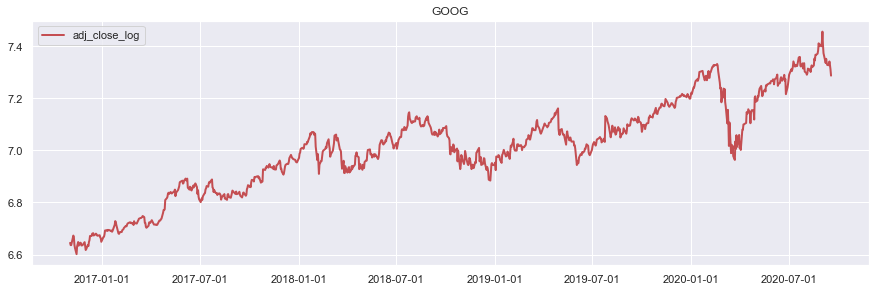

In [6]:
fig = plt.figure(figsize = (15,5))
plt.gcf().autofmt_xdate()
myFmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.plot(df.index,df['adj_close_log'], color='r', lw=2.,label = 'adj_close_log')
plt.title('GOOG')
plt.legend()
plt.show()

This particular transformation didn’t fully accomplish stationarity for this series. The range of the prices changed drastically and the upward trend of the series has been reduced which is a good first step. Logarithmic functions are [inverses](https://themathpage.com/aPreCalc/logarithmic-exponential-functions.htm) of exponential functions with the same base.

In [7]:
result = adfuller(df['adj_close_log'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.782332
p-value: 0.389268
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


### Square Root Transformation

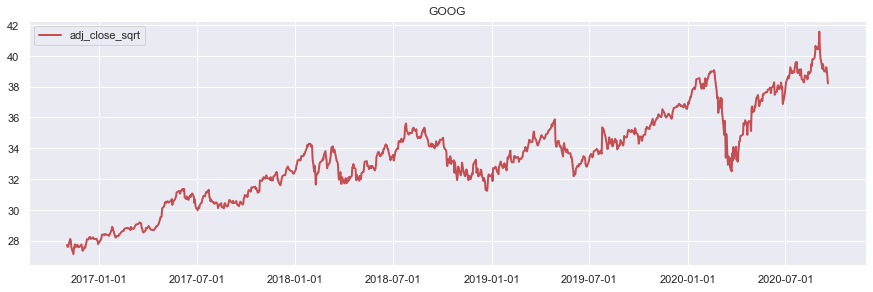

In [8]:
fig = plt.figure(figsize = (15,5))
plt.gcf().autofmt_xdate()
myFmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.plot(df.index,df['adj_close_sqrt'], color='r', lw=2.,label = 'adj_close_sqrt')
plt.title('GOOG')
plt.legend()
plt.show()

In [9]:
result = adfuller(df['adj_close_sqrt'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.690379
p-value: 0.436076
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


### Cubed Root Transformation

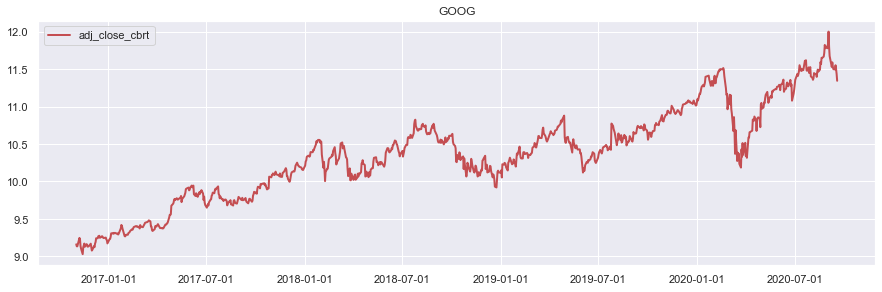

In [10]:
fig = plt.figure(figsize = (15,5))
plt.gcf().autofmt_xdate()
myFmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.plot(df.index,df['adj_close_cbrt'], color='r', lw=2.,label = 'adj_close_cbrt')
plt.title('GOOG')
plt.legend()
plt.show()

In [11]:
result = adfuller(df['adj_close_sqrt'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.690379
p-value: 0.436076
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


## Rolling Mean

You can subtract the rolling mean from a time series. This works especially well when the mean is time dependent. A rolling mean is the mean of the previous x number of observations in the series, where the time between each observation is consistent. You have to decide which time window works best for your data. Because I am using daily trading data I selected a window of 20 because that is how many trading days there are in a month, although this is not a universal window for financial data.

Pandas’ .rolling() method can be used to calculate this rolling mean. For instance, the code to calculate a 20 day rolling mean for my data is:


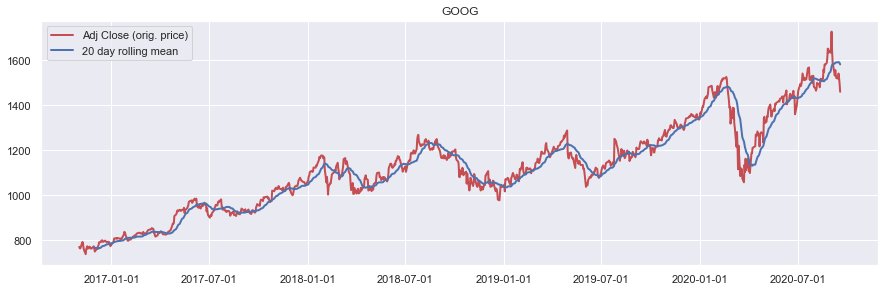

In [12]:
fig = plt.figure(figsize = (15,5))
plt.gcf().autofmt_xdate()
myFmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.plot(df.index,df['Adj Close']                            , color='r', lw=2.,label = 'Adj Close (orig. price)')
plt.plot(df.index,df['Adj Close'].rolling(window = 20).mean(), color='b', lw=2.,label = '20 day rolling mean')
plt.title('GOOG')
plt.legend()
plt.show()

I creat a new array of the rolling mean subtracted from the original closing price column and plot it to see if this improved stationarity in the series.


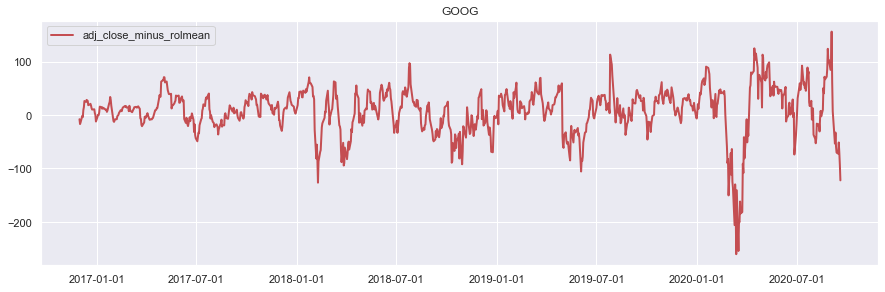

In [13]:
df['adj_close_minus_rolmean']=df['Adj Close']-df['Adj Close'].rolling(window = 20).mean()

fig = plt.figure(figsize = (15,5))
plt.gcf().autofmt_xdate()
myFmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.plot(df.index,df['adj_close_minus_rolmean'], color='r', lw=2.,label = 'adj_close_minus_rolmean')
plt.title('GOOG')
plt.legend()
plt.show()

In [14]:
result = adfuller(df['adj_close_minus_rolmean'].iloc[19:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.913456
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


This series appears to be much closer to stationarity. The upward trend is virtually gone but the variance is still apparent. For financial data, it is perfectly reasonable to remove the [weighted rolling mean](https://www.investopedia.com/ask/answers/071414/whats-difference-between-moving-average-and-weighted-moving-average.asp) from the original data as well. The weighted rolling mean assigns a greater weight to more recent observations. In Python this is calculated with the `.ewm()` method. There are several parameters available in this method which determine the individual weights of the observations including com, span, and halflife.

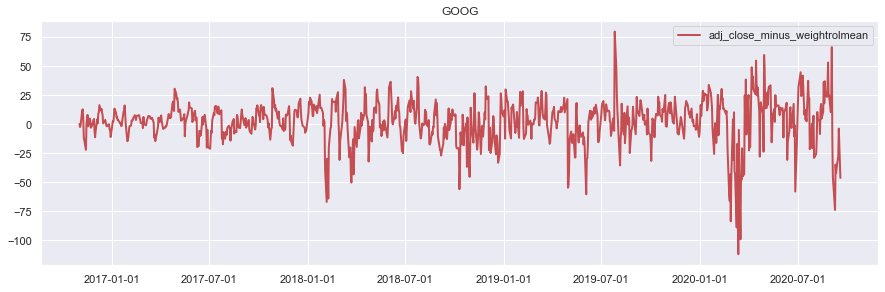

In [15]:
df['adj_close_minus_weightrolmean']=df['Adj Close']-df['Adj Close'].ewm(halflife = 2).mean()

fig = plt.figure(figsize = (15,5))
plt.gcf().autofmt_xdate()
myFmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.plot(df.index,df['adj_close_minus_weightrolmean'], color='r', lw=2.,label = 'adj_close_minus_weightrolmean')
plt.title('GOOG')
plt.legend()
plt.show()

In [16]:
result = adfuller(df['adj_close_minus_weightrolmean'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.020861
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


## Differencing

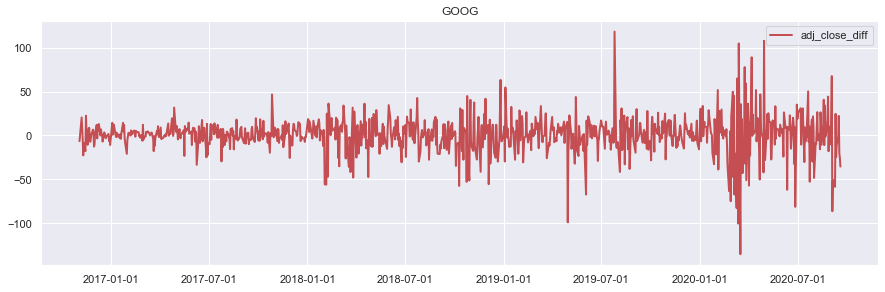

In [17]:
df['adj_close_diff']=df['Adj Close'].diff(periods=1)

fig = plt.figure(figsize = (15,5))
plt.gcf().autofmt_xdate()
myFmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.plot(df.index,df['adj_close_diff'], color='r', lw=2.,label = 'adj_close_diff')
plt.title('GOOG')
plt.legend()
plt.show()

In [18]:
result = adfuller(df['adj_close_diff'].iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.242168
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


## Additive/Multiplicative Decomposition

Time series decomposition is the process of separating time series data into its core components. These components include a potential trend (overall rise or fall in the mean), seasonality (a recurring cycle), and the remaining random residual. Nearly all time series that you will come across are not stationary, meaning that the mean, variance, or covariance will be time dependent. This is why data scientists must identify and separate trends and seasonality from time series data before applying a model.

You can manually remove trends by applying transformations, subtracting rolling means, and differencing to make your data stationary or you can use Python’s [statsmodels library](https://www.statsmodels.org/stable/index.html) to identify trends and seasonality.

**Decomposition**: All time series data can be broken down into four core components: 
- the average value, 
- a trend (i.e. an increasing mean), 
- seasonality (i.e. a repeating cyclical pattern), and 
- a residual (random noise).

Trends and seasonality are not always present in time dependent data. The residual is what’s left over after trends and seasonality are removed. Time series models assume that the data is stationary and only the residual component satisfies the conditions for stationarity.

**Model Type**: In decomposition you can choose between *additive* and *multiplicative* model type. This depends on if the amplitude of your data’s seasonality is level (mean) dependent. If the seasonality’s amplitude is independent of the level then you should use the additive model, and if the seasonality’s amplitude is dependent on the level then you should use the multiplicative model.

![alt text](https://kourentzes.com/forecasting/wp-content/uploads/2014/11/mseas.fig1_.png "Additive versus multiplicative time series data.")

Note the expanding variance of the seasonality in the multiplicative series on the right. If the level was decreasing the seasonal amplitude of the multiplicative case would decrease as well. Source “Additive and multiplicative seasonality — can you identify them correctly?” by [Nikolaos Kourentzes](https://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality/).

**Period**: The period of a time series can be infered from data. However, for our data the `infered_freq` method does not return a a value. It is possible that the issue arises with time series data where observations are not consistent, i.e. weekends are missing in daily data. 

The period can also be specified with a logical justification. You could test three frequencies for the time series data: 5, 20, and 253. Five because that is how many trading days there are in a week, 20 trading days per month, and 253 per year (Note: You have to have at least twice as many observations in your data as the frequency that you want to test; i.e. if you want to set the frequency to 253 then you need at least 506 observations).

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
print(pd.DatetimeIndex(df['Adj Close']).inferred_freq)

None


In [20]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [21]:
@interact(model=['additive','multiplicative'], period=widgets.IntSlider(min=1, max=253, step=1, value=5, continuous_update=False))
def g(model, period):
    # Obtain the three series
    decomposition = seasonal_decompose(df['Adj Close'], model=model, period=period)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    residual.dropna(inplace=True)
    result = adfuller(residual)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %e' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    # Plot gathered statistics
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(df['Adj Close'], label='Original', color="blue")
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color="blue")
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color="blue")
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color="blue")
    plt.legend(loc='best')
    plt.tight_layout()
    return (plt.show())

interactive(children=(Dropdown(description='model', options=('additive', 'multiplicative'), value='additive'),…

I compared the results of the Dickey-Fuller test for the additive models with the three frequency values, the model with a period of 5 days had the smallest p-value.

The seasonal decompose method broke down the data into three portions, trend, seasonality, and random residual components. The residual component of the series with a period set to 5 is stationary because the p-value of 3.676016e-18 is far less than 0.05.

**Comparison of Results**: The p-value of the Dickey-Fuller test was smallest for the multiplicative model for two out of the three tested periods; 5 and 20 days. The best performing model was the multiplicative model with a period set to 5 days. Only a period of 253 days had p-values above 0.05, the results are below:

| Period | Additive Model p-value | Multiplicativ Model p-value |   |   |   |   |   |   |   |   |   |   |   |   |
|--------|------------------------|-----------------------------|---|---|---|---|---|---|---|---|---|---|---|---|
| 5      | 3.676016e-18           | 2.487101e-18                |   |   |   |   |   |   |   |   |   |   |   |   |
| 20     | 4.572445e-18           | 4.257417e-18                |   |   |   |   |   |   |   |   |   |   |   |   |
| 253    | 1.980086e-02           | 2.104326e-02                |   |   |   |   |   |   |   |   |   |   |   |   |
